<a href="https://colab.research.google.com/github/hrumst/ML/blob/master/Competition_self_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%config IPComplater.greedy = True

In [2]:
from google.colab import drive

DRIVE_MOUNT = './DRIVE/'
DRIVE_MOUNT_SAVE_MODEL_PATH = 'My Drive/Colab Notebooks/competition_7/brand-logo-detection-dataset.zip'
drive.mount(DRIVE_MOUNT, force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./DRIVE/


In [3]:
!rm -rf input \
&& mkdir input \
&& unzip "./DRIVE/My Drive/competition_7/brand-logo-detection-dataset.zip" -d input

Archive:  ./DRIVE/My Drive/competition_7/brand-logo-detection-dataset.zip
   creating: input/brand-logo-detection-dataset/
   creating: input/brand-logo-detection-dataset/trainval_jpg/
  inflating: input/brand-logo-detection-dataset/trainval_jpg/4652863706.jpg  
   creating: input/__MACOSX/
   creating: input/__MACOSX/brand-logo-detection-dataset/
   creating: input/__MACOSX/brand-logo-detection-dataset/trainval_jpg/
  inflating: input/__MACOSX/brand-logo-detection-dataset/trainval_jpg/._4652863706.jpg  
  inflating: input/brand-logo-detection-dataset/trainval_jpg/4328758763.jpg  
  inflating: input/__MACOSX/brand-logo-detection-dataset/trainval_jpg/._4328758763.jpg  
  inflating: input/brand-logo-detection-dataset/trainval_jpg/320927855.jpg  
  inflating: input/__MACOSX/brand-logo-detection-dataset/trainval_jpg/._320927855.jpg  
  inflating: input/brand-logo-detection-dataset/trainval_jpg/2653776560.jpg  
  inflating: input/__MACOSX/brand-logo-detection-dataset/trainval_jpg/._26537765

In [22]:
import pandas as pd

BASE_DATA_DIR = 'input/brand-logo-detection-dataset/'
df = pd.read_csv(BASE_DATA_DIR + 'trainval_bboxes.txt', header=None)
df.columns = ['image_id','brand_name','x', 'y', 'width', 'height']
df.head()

,image_id,brand_name,x,y,width,height
0,2325670467.jpg,google,51,198,892,342
1,2359495755.jpg,google,73,228,948,327
2,2727802511.jpg,google,68,72,854,311
3,321106127.jpg,google,461,354,519,203
4,343855903.jpg,google,176,104,686,413


In [5]:
print(len(df['brand_name'].unique()))
print(df['brand_name'].unique())
# print(df.groupby('brand_name').agg({'image_id':'count'}))
# print(df.groupby('image_id').agg({'brand_name': 'count'}))




32
['google' 'apple' 'adidas' 'HP' 'stellaartois' 'paulaner' 'guiness'
 'singha' 'cocacola' 'dhl' 'texaco' 'fosters' 'fedex' 'aldi' 'chimay'
 'shell' 'becks' 'tsingtao' 'ford' 'carlsberg' 'bmw' 'pepsi' 'esso'
 'heineken' 'erdinger' 'corona' 'milka' 'ferrari' 'nvidia' 'rittersport'
 'ups' 'starbucks']


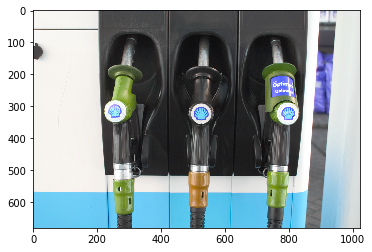

image_id      106310488.jpg
brand_name            shell
x                       233
y                       292
width                    49
height                   49
Name: 992, dtype: object


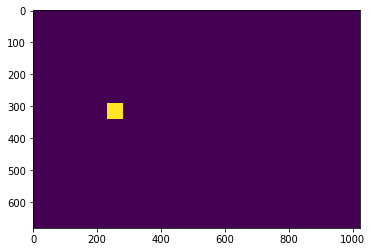

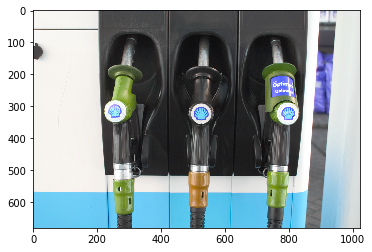

image_id      106310488.jpg
brand_name            shell
x                       503
y                       301
width                    49
height                   49
Name: 993, dtype: object


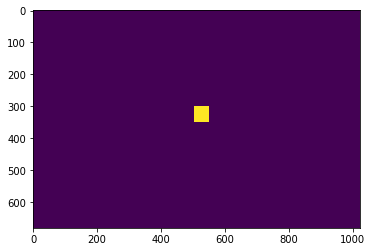

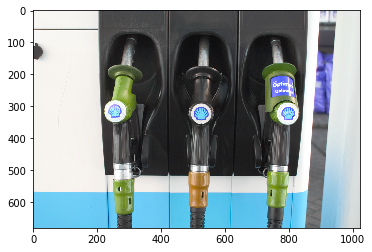

image_id      106310488.jpg
brand_name            shell
x                       775
y                       301
width                    49
height                   49
Name: 994, dtype: object


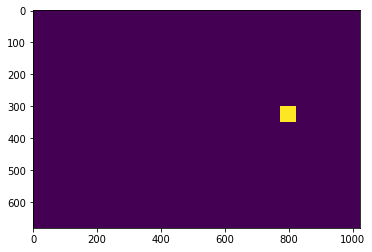

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

IMAGE_WIDTH = 1024
IMAGE_HEIGHT = 1024

image_data = df[df['image_id'] == '106310488.jpg']
for index, row in image_data.iterrows():
    path = BASE_DATA_DIR + 'trainval_jpg/' + row['image_id']
    img = cv2.imread(path)
    img_width, img_heigth, channels = img.shape

    plt.imshow(img)
    plt.show()
    plt.pause(.01)
    mask = np.zeros((img_width, img_heigth))
    print(row)
    mask[row['y']:row['y'] + row['width'], row['x']:row['x'] + row['height']] = 1
    plt.imshow(np.squeeze(mask))
    plt.show()
    plt.pause(.01)
